# <font face="times"><font size="6pt"><p style = 'text-align: center;'> BRYN MAWR COLLEGE

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Computational Methods in the Physical Sciences</b><br/><br/>

<p style = 'text-align: center;'><b>Module 8: Data Analysis & Visualization </b><br/><br/> 

***Prerequisite modules***: Module 6 -- Linear Equations; Module 7 -- Eigenequations 

***Estimated completion time***: 3 hours  

***Learning objectives***: Become familiar with the basic approach to numerical least-squares fitting of data and explore some basic features of the Pandas data science package and Bokeh data visualization package.  Introductions to singular value decomposition and principal components analysis are provided in appendices.


<img src = './Images/friction_xkcd.png'  width=300>

<center>(Image credit: https://xkcd.com/815)</center>

Extracting information from data is a central activity in all of the sciences and engineering, as well as other quantitative fields such as economics.  One common need is to fit a set of data using a linear or nonlinear curve.  Most numerical software --- including spreadsheets, Mathematica, MATLAB, etc. --- will offer a range of options for performing such fits.  This module will explore some of the basic ideas underlying those fitting methods, which might be helpful to know when trying to fit data that's poorly modeled by standard functions.  As another example of a data analysis technique, this module also introduces principal components analysis, used for finding relationships between correlated variables.  This module barely scratches the surface of the body of established data analysis techniques.  For more information, see the Wikipedia page on data analytics.

### <font color="blue">Scientist Profile</font>

**Jeannette Wing** is a computer scientist who works in the areas of trustworthy computing (security and privacy), distributed systems, programming languages, and software engineering, among others.  She received her bachelor's (1979), master's (1979) and Ph.D. (1983) degrees from MIT, and taught briefly at the University of Southern California before moving to Carnegie Mellon University.  She has been on the editorial boards of several important computer science journals, and served as assistant director of the Computer and Information Science and Engineering Directorate at the National Science Foundation from 2007-2010: this directorate funds academic research in computer science in the U.S.  Currently, she serves as a Corporate Vice President at Microsoft Research.  (Profile information from https://www.microsoft.com/en-us/research/people/wing/ and http://www.cs.cmu.edu/~wing/.)

<img src = './Images/Jeannette_Wing.jpg'  width=200>

<center>(Image credit: https://news.microsoft.com/2012/11/20/microsoft-hires-jeannette-wing-as-new-vice-president-head-of-microsoft-research-international/)</center>

## <font color="blue">8.1  Linear Least-Squares Fitting</font>

The general problem we are considering here$^1$ is one in which we have $N$ data points of the form $(x_i, y_i)$ that obey some assumed relationship $y = y(x)$, so that for each point

\begin{equation}
y_i = y(x_i). 
\end{equation}

Here, we're thinking of $x$ as the independent variable and $y$ as the dependent variable.  Our goal is to represent the relationship $y(x)$ in terms of some parameters $a_j$ which will correspond to coefficients of ***basis functions*** $F_j(x)$ in a sum of $M$ terms, as in

\begin{equation}
y(x) = \sum_{j=1}^M a_j F_j(x). 
\end{equation}

The expression on the right is called a ***linear model*** because the *coefficients* enter the expression linearly; the $F_j(x)$ themselves generally are *non*linear functions of $x$, however.  A common choice for the set of functions $F_j$ is the polynomials --- $F_1(x) = 1, F_2(x) = x, F_3(x) = x^2$, etc. --- but they could also be $\sin(x)$ or $\cos(x)$ (in a Fourier series), exponential functions, or whatever else might be appropriate for the problem at hand.  

Once the set of functions is chosen, the most common criterion to use in determining the coefficients is the ***least squares*** condition, in which we require that the following sum-of-squares expression be a minimum:

\begin{equation}
S \equiv \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left[ y_i - \sum_{j=1}^M a_j F_j(x_i) \right]^2 .  \hspace{50pt} (1) %\label{lssum}
\end{equation}
  
For a given $i$, the term in brackets represents the difference between the $i^{\text{th}}$ data value, $y_i$, and the approximation to it resulting from the model (i.e., the best-fit curve).  This difference, represented by $r_i$, is called a ***residual***, shown in Figure 1 as the vertical orange line segments.  The goal of least-squares fitting is to find the set of coefficients $a_i$ that minimizes the sum of squared residuals.  In the best-case scenario, the model exactly fits all of the data, so all of the residuals vanish and the least-squares sum is zero.  [This will happen automatically if the basis functions $F_j$ are independent, and if $M \ge N$; i.e., the number of basis functions is greater than or equal to the number of data points.  This would occur, for instance, if we fit two points with a straight line (of the form $a_0 + a_1 x$, using two basis functions) or a quadratic polynomial ($a_0 + a_1 x + a_2 x^2$, using three basis functions).]  

It should be noted that if the basis functions are not independent --- i.e., if there is a set of coefficients $b_j$, not all of which are zero, such that $\sum_{j=1}^M b_j F_j(x_i) = 0$ \, (for $i = 1, 2, \dots, N$) --- then the requirement that the sum above be minimized will not uniquely determine the $a_i$; thus, more than one set of $a_i$ could minimize $S$.


<img src = './Images/residuals-2-cropped.jpg'  width=400>

<center><b>Figure 1</b>: Linear data fit with residuals</center>
<br>
<center>(Image credit: http://www.zweigmedia.com/RealWorld/calctopic1/regression.html )</center>

Multiple approaches exist for finding the $a_i$ that minimize Eq. (1).  The obvious one is to use calculus: just as we minimize a function $f(x)$ by requiring $df/dx = 0$, in this case involving multiple $a_i$ variables we should differentiate $S$ with respect to *each* of the $a_i$, and require the results to be zero; that is, using partial derivatives, require $\partial S / \partial a_k = 0$ for all $k$ ($k = 1, 2, \dots, N$).  Doing this, and reversing the order of the sums, the result is

\begin{equation}
\sum_{j=1}^M \left[ \sum_{i=1}^N F_j(x_i) F_k(x_i) \right] a_j = \sum_{i=1}^N y_i F_k(x_i) .  
\end{equation}

<font color="green"><b>Breakpoint 1</b></font>: Obtain this result by differentiating the previous equation and setting the result to $0$.  (Hints: Think of each of the other $a$'s as constants when differentiating with respect to a particular $a_k$.  It may help to expand a few terms in the sums, take their derivatives, and then rewrite the sums.)

This expression represents a set of $M$ simultaneous equations in the $M$ unknown $a_j$'s, called the ***normal equations***, which can be written in the matrix form $\mathbf{M} \mathbf{a} = \mathbf{q}$, where the matrix $\mathbf{M}$ and vector $\mathbf{q}$ have components

\begin{align}
M_{kj} & = \sum_{i=1}^N F_k(x_i) F_j(x_i) ,  \\
q_k & = \sum_{i=1}^N y_i F_k(x_i) ,   
\end{align}

and the components of vector $\mathbf{a}$ are just the $a_j$.  Note that the elements of $\mathbf{M}$ depend only on the basis functions, not on the data values (the $y_i$), while the elements of $\mathbf{q}$ depend on both.  

As an example, suppose we wish to fit $N$ data points ($x_i, y_i$) with a straight line, $y(x) = a_1 + a_2 x$ (so $F_1(x_i) = 1$ and $F_2(x_i) = x_i$).  Then $M_{11} = \sum 1 \cdot 1$, $M_{12} = \sum 1 \cdot x_i = M_{21}$, $M_{22} = \sum x_i \cdot x_i$, and $q_{1} = \sum y_i \cdot 1$, $q_{2} = \sum y_i \cdot x_i$.  Hence, $\mathbf{M}$ and $\mathbf{q}$ take the forms

\begin{equation}
\mathbf{M} = 
\left( 
\begin{matrix}  
N & \sum x_i  \\
\sum x_i & \sum x_i^2  
\end{matrix} 
\right) \hspace{5mm} \textrm{and} \hspace{5mm} 
\mathbf{q} = 
\left( 
\begin{matrix}  
\sum y_i  \\
\sum x_i y_i  
\end{matrix} 
\right) , 
\end{equation}

where the sums run from 1 to $N$.  The normal equations can be solved by one of the methods introduced in Module 6, except in the not uncommon situation that $\mathbf{M}$ has a form that is singular or nearly so, which can lead to large errors in the computed $a_j$'s.  As noted in that module, a new method known as ***singular value decomposition*** (SVD) can be used to treat such situations.  Since that method works perfectly well in the case of non-singular matrices too, it is the technique of choice for linear least-squares fitting.  The SVD approach is fairly complicated so it will not be discussed here, but an explanation is provided in Appendix 1 for the interested reader.  Fortunately, a SVD function is provided in the `numpy.linalg` package. 


<font color="green"><b>Breakpoint 2</b></font>: Write out the forms of $\mathbf{M}$ and $\mathbf{q}$ for the case that we wish to fit $N$ data points with a quadratic polynonial, $a_0 + a_1 x + a_2 x^2$.

It's worth mentioning that often one wants to fit a set of data with known measurement uncertainties.  If we denote by $\delta_i$ the uncertainty in the data value $y_i$, then in the presence of measurement uncertainties the definitions of the $\mathbf{M}$ matrix and $\mathbf{q}$ vector in the normal equations are modified to

\begin{align}
M_{kj} & = \sum_{i=1}^N \dfrac{1}{\delta_i^2} \, F_k(x_i) F_j(x_i) ,   \hspace{50pt}  (2)  \\  %\label{normalM}  
q_k & = \sum_{i=1}^N \dfrac{1}{\delta_i^2} \,y_i F_k(x_i)  \hspace{68pt}  (3)  %\label{normalq} .
\end{align}

The rest of the analysis in this situation proceeds just as in the case of no specified uncertainties (which corresponds to $\delta_i = 1$, for all $i$).

## <font color="blue">8.2  An Introduction to Pandas for Data Analysis</font>

***Pandas*** (http://pandas.pydata.org/) is a data analysis library written in Python that provides tools for creating, manipulating, and analyzing data files of different formats (and which often is used in "big data" applications, where computer speed and memory limitations can be concerns).   A set of tutorials can be found here: https://pandas.pydata.org/pandas-docs/stable/tutorials.html .

The first part of this section is adapted from https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/01%20-%20Lesson.ipynb

To start, import the necessary libraries:

In [2]:
# Import all libraries needed for the tutorial

import matplotlib.pyplot as plt
import pandas as pd 

# Enable inline plotting
%matplotlib inline

The cell below creates two lists of data: baby names (from the year 1880) and the corresponding numbers of births:

In [35]:
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]

Next, they're combined into a single list (2 by 5) using the ***`zip()`*** function -- like a zipper, it pairs each element of the first list with the corresponding element of the second list:

In [36]:
BabyDataSet = list(zip(names,births))
BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]

In the next cell, the data set is put into an object called a ***Data Frame***, which formats it more like a spreadsheet or database table; the `df` line displays the data:

In [37]:
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
df

Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973

The next cell exports the data frame to a ***csv*** (comma-separated value) file, named `births1880.csv`, which can be read by spreadsheet programs like Excel, and by database programs as well.  The file will be saved in the same directory in which the creating notebook resides.

In [38]:
df.to_csv('births1880.csv', index=False, header=False)

The next cell will read the data back in, using the ***`read_csv()`*** function.  That function can take many arguments (remember that you can get information on a function by typing its name followed by a question mark in a code cell and running the cell), but we'll just give it the filename:  

In [39]:
df2 = pd.read_csv('births1880.csv')
df2

Bob  968
0  Jessica  155
1     Mary   77
2     John  578
3      Mel  973

This doesn't look right! That's because in calling the `to_csv` function earlier, we passed the argument `header=False`, which told the function that we did not want to save the headers ("Names", "Births") in the columns of the data table. But `read_csv`, which was just called, assumes that the first row of items are headers. To fix this problem, we can call `read_csv` with the additional argument `header=None`:

In [40]:
df2 = pd.read_csv('births1880.csv', header=None)
df2

0    1
0      Bob  968
1  Jessica  155
2     Mary   77
3     John  578
4      Mel  973

Note that the data was read in correctly this time, and that the `read_csv` function added a header row with the numbers 0 and 1.

An alternative solution would have been to supply our own headers, as follows:

In [41]:
df3 = pd.read_csv('births1880.csv', names=['Names', '# Births'])
df3

Names  # Births
0      Bob       968
1  Jessica       155
2     Mary        77
3     John       578
4      Mel       973

Next, let's check the data types of the entries in our file.  All of the 'Names' should be strings, while all of the 'Birth' numbers should be integers:

In [42]:
df.dtypes

Names     object
Births     int64
dtype: object

Apparently, Pandas often identifies strings as being of `object` type, and `int64` indicates 64-bit integers.   

We can sort them, for example from largest to smallest number of births (in a "descending" sort)...

In [43]:
SortedD = df.sort_values(['Births'], ascending=False)
SortedD

Names  Births
4      Mel     973
0      Bob     968
3     John     578
1  Jessica     155
2     Mary      77

Or an "ascending" sort, from smallest to largest...

In [44]:
SortedA = df.sort_values(['Births'], ascending=True)
SortedA

Names  Births
2     Mary      77
1  Jessica     155
3     John     578
0      Bob     968
4      Mel     973

Or on the names...

In [45]:
SortedN = df.sort_values(['Names'], ascending=True)
SortedN

Names  Births
0      Bob     968
1  Jessica     155
3     John     578
2     Mary      77
4      Mel     973

Of course, we also can find maximum and minimum values:

In [46]:
dfmax = df["Births"].max()
print(dfmax)

dfmin = df["Births"].min()
print(dfmin)

973
77


Now, let's try working with more interesting data: radial velocity values of a star, e.g. R Arietis, taken from the website http://vizier.cfa.harvard.edu/viz-bin/VizieR-4.  The site gave the option of downloading the data as a tab-separated file, which it labeled "asu.tsv".  An extra column (with "A," "B," "C," and "D" values) was added before the star data to make it possible to demonstrate some of Panda's other capabilities.  We can pretend that these values represent observations by different sensors on a satellite.

To read in the data, we'll use the `read_csv()` function we used before, but we'll have to specify that our data file is tab-separated , rather than comma-separated (with argument `sep='\t'`).  We'll also have to ignore the first 36 rows (argument `skiprows=36`), which contain background and formatting information.  To keep the file small for display, we'll read just the first 12 rows after the 36 ignored ones (argument `nrows=12`).  The entire set of data will be labeled `star`.  

We'll add a header row to label the four columns of values as `Sensor`, `Date`, `RV`, and `Unc`.  The "`usecols`" parameter specifies which columns to use: the first column is the sensor used, the second is the date of observation of the star (in "Heliocentric Julian date" format), the third is the star's radial velocity (in m/s), and the fourth is the uncertainty in that velocity (also in m/s).

In [93]:
star = pd.read_csv('Supplements/asu.tsv', sep='\t', skiprows=36, nrows=12, usecols=[0,1,2,3], header=None, names=['Sensor', 'Date', 'RV', 'Unc'])
star

Sensor         Date    RV  Unc
0       A  2452948.109   8.4  6.0
1       D  2452948.112   3.9  6.4
2       C  2452948.114   6.2  5.9
3       A  2452948.116   5.6  5.8
4       B  2452948.118  13.6  5.9
5       A  2452948.119  10.6  5.9
6       C  2452948.121   5.4  6.0
7       D  2452948.123   6.4  6.5
8       D  2452948.124  12.2  6.3
9       C  2452948.126  17.1  6.2
10      A  2452948.128  14.0  6.9
11      B  2452948.130   7.0  6.6

Suppose we want to select just the rows that correspond to Sensor A.  That's easy...

In [48]:
groupA = star[star['Sensor']=='A']    
groupA

Sensor         Date    RV  Unc
0       A  2452948.109   8.4  6.0
3       A  2452948.116   5.6  5.8
5       A  2452948.119  10.6  5.9
10      A  2452948.128  14.0  6.9

The command `star[star['Sensor']=='A']` pulls out the elements of `star` that satisfy the condition `star['Sensor']=='A'`.  (Note the *double*-equals sign, `==`, in the selection command.)

We also can filter on values.  For example, we can find all of the rows in which the radial velocity is greater than or equal to 10:

In [49]:
RV10 = star[star['RV'] >= 10] 
RV10

Sensor         Date    RV  Unc
4       B  2452948.118  13.6  5.9
5       A  2452948.119  10.6  5.9
8       D  2452948.124  12.2  6.3
9       C  2452948.126  17.1  6.2
10      A  2452948.128  14.0  6.9

To filter on multiple values, you can use Python's logical operators.  For example, to find the data from sensor A or sensor B, use the OR operator "`**|**`" as follows:

In [50]:
groupAB = star[(star['Sensor']=='A') | (star['Sensor']=='B')]    
groupAB

Sensor         Date    RV  Unc
0       A  2452948.109   8.4  6.0
3       A  2452948.116   5.6  5.8
4       B  2452948.118  13.6  5.9
5       A  2452948.119  10.6  5.9
10      A  2452948.128  14.0  6.9
11      B  2452948.130   7.0  6.6

Note the parentheses around each of the two conditions.  

For more extensive combinations, it's easier to use the `isin` function (standing for "is in," not "I sin"!), like so:

In [51]:
groupAB = star[star['Sensor'].isin(['A','B'])]
groupAB

Sensor         Date    RV  Unc
0       A  2452948.109   8.4  6.0
3       A  2452948.116   5.6  5.8
4       B  2452948.118  13.6  5.9
5       A  2452948.119  10.6  5.9
10      A  2452948.128  14.0  6.9
11      B  2452948.130   7.0  6.6

To find the data that satisfies multiple conditions, e.g. Dates that lie between two values, use the AND operator "**`&`**":

In [52]:
groupRange = star[(star['Date'] > 2452948.114) & (star['Date'] < 2452948.124)]    
groupRange

Sensor         Date    RV  Unc
3      A  2452948.116   5.6  5.8
4      B  2452948.118  13.6  5.9
5      A  2452948.119  10.6  5.9
6      C  2452948.121   5.4  6.0
7      D  2452948.123   6.4  6.5

Again note the parentheses around the two conditions.

We can easily plot histograms of the data in a table.  Here's one of the radial velocities:

array([[<AxesSubplot:title={'center':'RV'}>]], dtype=object)

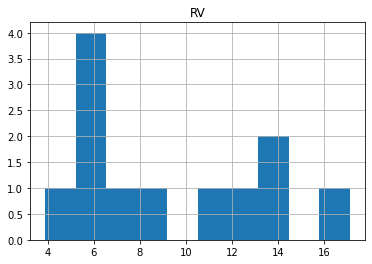

In [53]:
star.hist(column='RV')

Other examples of how to use Pandas to perform tasks that you might otherwise do in a spreadsheet program like Excel are presented here: http://pbpython.com/excel-pandas-comp-2.html 

This discussion barely scratches the surface of what Pandas can do.  For further information see the link at the top of this section or the **Python Data Science Handbook** by Jake VanderPlas, here https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/README.md.

## <font color="blue">8.3  Visualizing Data
    
### <font color='blue'>8.3.1 Matplotlib</font>

We've already used `matplotlib` for displaying data in several formats, but those examples only scratch the surface of its capabilities.  The cell below displays another example -- a "heatmap" taken from the webpage [matplotlib examples](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html).  This kind of plot often is used to display scalar data taking on a continuous range of values; e.g., temperatures, voltages, etc.  The color scheme for the display is called a ***colormap***, of which many are available in `matplotlib`; see https://matplotlib.org/stable/tutorials/colors/colormaps.html.  

The key lines to create the plot to be shown (by the command `plt.show()` at the end) are

```python
   fig, ax = plt.subplots()              
   im = ax.imshow(harvest, cmap='rainbow')
```
where `harvest` is the data array to be shown.  The colorbar shown to the right of the main figure is produced by the lines

```python
   cax = fig.add_axes([0.8, 0.29, 0.02, 0.6])
   cb = mpl.colorbar.ColorbarBase(cax, cmap='rainbow', spacing='proportional')
   cb.set_label('tons/yr')
```
Here, the array `[0.8, 0.29, 0.02, 0.6]` controls the position and size of the colorbar, and `rainbow` is the colormap being used.

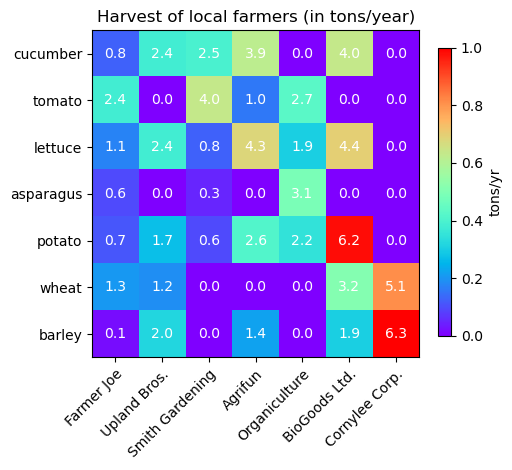

In [3]:
import matplotlib as mpl
import numpy as np


vegetables = ["cucumber", "tomato", "lettuce", "asparagus", "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening", "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

# Raw data (tons/yr of each vegetable grown by each farmer)
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()              # create figure
im = ax.imshow(harvest, cmap='rainbow')   # show the figure; 'bwr' specifies the colormap to use

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j], ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()

# Create and position colorbar beyond right-hand edge of figure
cax = fig.add_axes([0.8, 0.29, 0.02, 0.6])
cb = mpl.colorbar.ColorbarBase(cax, cmap='rainbow', spacing='proportional')
cb.set_label('tons/yr')

plt.show()

Here's another example of what `matplotlib` can do: a vector plot in 2-D.  (3-D plots also are possible.)  It uses the ***`quiver()`*** function, which takes a set of arrow locations (`X`, `Y`) and a set of arrow components (`U`, `V`) and plots vectors with those components at the specified locations.  The ***`meshgrid()`*** function converts the `X`, `Y` coordinates into a grid with intersections at those points.  (Example adapted from the `matplotlib` documentation.)

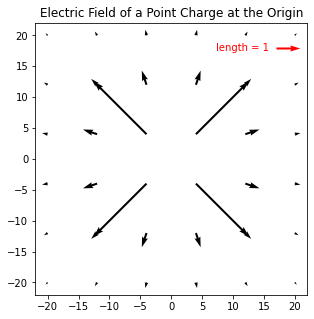

In [146]:
# Coordinates of grid line intersections
x = np.arange(-20, 21, 8)
y = np.arange(-20, 21, 8)

# Create grid from intersection points
X, Y = np.meshgrid(x,y)

R = np.sqrt(X**2 + Y**2)   # square-distance from origin to X-Y grid point

# Components of vectors to plot
U = 100*X/R**3
V = 100*Y/R**3

fig, ax = plt.subplots(figsize = (5,5))
ax.set_title('Electric Field of a Point Charge at the Origin')
ax.set_box_aspect(1)

q = ax.quiver(X, Y, U, V)   # plot vector field with components (U,V) at positions (X,Y)
ax.quiverkey(q, X=17, Y=18, U=1, label='length = 1', labelpos='W', 
             coordinates="data", labelcolor='red', color='red')

plt.show()

Another type of plot often used in physics and engineering is the contour plot.  Here is an example showing the electric potential contour lines of an electric dipole using the function `contour()` (see https://matplotlib.org/stable/plot_types/arrays/contour.html for another example).

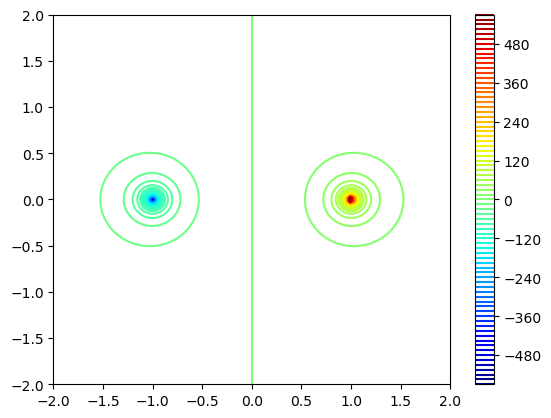

In [3]:
import numpy as np

# make data
X, Y = np.meshgrid(np.linspace(-2, 2, 128), np.linspace(-2, 2, 128))  # grid points at which to calculate function values

Z = 10/np.sqrt((X-1)**2 + Y**2) - 10/np.sqrt((X+1)**2 + Y**2)           # dipole potential function

lower = np.round(np.min(Z))
upper = np.round(np.max(Z))
levels = np.arange(lower, upper+1, 0.2)                               # levels at which to draw contours

# plot
plt.contour(X, Y, Z, levels=80, cmap='jet')
plt.colorbar()

Choosing the colormap for a plot like this is challenging, since the map is fairly uniform in potential except right near the charges, where we can see dark blue on the left and dark red on the right.  (Choosing a good colormap can be part science, part art.)

This behavior of the potential is easier to see in a continuous plot of the potential, which can be made with the `contourf()` function:

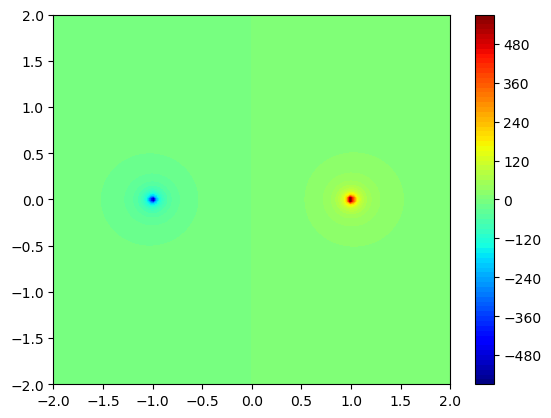

In [4]:
plt.contourf(X, Y, Z, levels=80, cmap='jet')
plt.colorbar()

`matplotlib` is very powerful in that it allows the programmer to fine tune many plot details, but that also can make it easier to get bogged down in lots of details.  Other plotting libraries built on `matplotlib` package the "low level" functionality of `matplotlib` into easier-to-use "higher level" functions.  Some such libraries are ***Bokeh***, ***Plotly***, ***Seaborn***, and ***Pygal***.  A comparison between some of them is provided here: https://www.dataquest.io/blog/python-data-visualization-libraries/. 


### <font color='blue'>8.3.2 Bokeh</font>

Here we'll briefly explore Bokeh, which often is used along with Pandas, particularly for large data sets, and which is designed for interactive plotting in browsers.  A quick demonstration of a couple Bokeh plots is provided below.  For more information, see http://bokeh.pydata.org/en/latest/.

In [89]:
import numpy as np
import scipy.special

from bokeh.plotting import figure, output_notebook, show

In [90]:
output_notebook()   # Make Bokeh plots display in the notebook (as "%matplotlib inline" does for matplotlib plots)

Loading BokehJS ...

This plot shows the radial velocity vs. date for the star data explored above as a line plot:

In [94]:
p1 = figure(title="Radial Velocity vs. Date", plot_width=400, plot_height=300)
p1.line(star['Date'], star['RV'], line_width=2)    # make a line plot of the RV vs. the Date
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Radial Vel.'
show(p1)

The first line in the code cell above creates the figure frame itself, with title, while the second line creates the curve that's plotted.

The stellar velocity data we're using normally wouldn't be plotted as a bar chart, but we can do it for illustrative purposes:

In [95]:
p2 = figure(title="Radial Velocity vs. Date", plot_width=400, plot_height=300)
p2.vbar(x=star['Date'], top=star['RV'], width=0.001)    
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Radial Vel.'
show(p2)

Again, the first line in the code cell creates the figure frame, while the second line, using `p2.vbar`, creates the histogram bars with horizontal positions specified by `x=star['Date']` and height specified by `top=star['RV']` (with the specified `width` for each bar).

Note that these plots are *interactive* -- they have a ***toolbar*** on the right-hand side that lets you zoom in on a region by using the magnifying glass icon and drawing a rectangle with the cursor, and you can pan using the icon with the four arrowheads and then clicking-and-dragging in the window.  Hover the cursor over an icon to find out what it does.  (You can reset a figure to its original appearance using the icon with the two arrows chasing each other in a circle.)  The toolbar is configurable, as described here: https://docs.bokeh.org/en/latest/docs/user_guide/tools.html. 

As further illustration of the flexibility of plotting with Bokeh, see the plot created from data generated in the code cell below, which defines a function (`make_plot`) to create the figure:

In [96]:
def make_plot(title, hist, edges, x, pdf, cdf):
    p = figure(title=title, tools='', background_fill_color="#fafafa", plot_height=400)
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="navy", line_color="white", alpha=0.5)
    p.line(x, pdf, line_color="green", line_width=4, alpha=0.7, legend_label="PDF")
    p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p

# Normal Distribution
mu, sigma = 0, 0.5

measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p3 = make_plot("Normal Distribution (μ=0, σ=0.5)", hist, edges, x, pdf, cdf)
show(p3)

This example was taken from http://bokeh.pydata.org/en/latest/docs/gallery.html#gallery, which has several other interesting examples of types of plots (with code) that can be created with Bokeh.  Here we see a combination of line plots with a histogram, with different colors for all the features.

And here we see a simple example that will set up a manipulable plot.  The cell of code below produces a sine curve, which is what the plot below shows initially.  The `update()` function defined in this code creates a drop-down menu that allows the user to select one of three trig functions to plot, and the last two lines of that function produce the plot.

In [97]:
from ipywidgets import interact
from bokeh.io import push_notebook

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

p4 = figure(title='Interactive trig function example', plot_height=300, plot_width=600, y_range=(-5,5))
r = p4.line(x, y, color="red", line_width=3)

def update(f, w=1, A=1, phi=0):
    if   f == "sin":
        func = np.sin
    elif f == "cos":
        func = np.cos
    elif f == "tan":
        func = np.tan
        
    r.data_source.data['y'] = A * func(w * x + phi)
    
    push_notebook()


In [98]:
show(p4, notebook_handle=True)

The next code cell calls the ***`ipywidgets` `interact()`*** function to create a set of controls that allow the plotted function and its parameters to be adjusted.  Try it!

In [99]:
interact(update, f = ['sin', 'cos' , 'tan'], w=(1,50), A=(1,5,0.2), phi=(0, 20, 0.1))

interactive(children=(Dropdown(description='f', options=('sin', 'cos', 'tan'), value='sin'), IntSlider(value=1…

<function __main__.update(f, w=1, A=1, phi=0)>

### <font color="blue">Recap and Final Comments</font>

* Least-squares fitting of a set of data using a series expansion in user-selected basis functions amounts to solving a set of simultaneous equations --- the normal equations $\mathbf{Ma} = \mathbf{q}$ --- for the vector $\mathbf{a}$ representing the coefficients of the basis functions.  This can be done using the methods of Module 6.  
<br>

* It would take an entire book to fully present the use of any of the libraries mentioned above.  The best way to find out how to create a specific type of plot would be to find an example of a similar one online and adapt it to your needs.
<br>

* Pandas is a very popular Python library for "big data" applications.  It can be used in tandem with Bokeh or other robust plotting libraries for data visualization.  
<br>

* A nice resource on data science, statistics, and Python is the free e-book titled **Computational and Inferential Thinking: The Foundations of Data Science** used in the Foundations of Data Science course at the University of California at Berkeley and available here https://www.inferentialthinking.com/.  (Note that it uses a data analysis library called **datascience** instead of Pandas.)
<br>

* From Appendix 1: singular value decomposition is a method of factorizing matrices that permits the solution of equations like the normal equations even in the case of singular $\mathbf{M}$.  The Python function `svd` in the `numpy.linalg` package implements this method.  [The reader who wishes to use this method without reading the entire Appendix can start at the paragraph just before Eq. (6).] 
<br>

* From Appendix 2: principal components analysis is a powerful technique for finding the strongest relationships between correlated variables as the eigenvectors of the covariance matrix corresponding to the largest eigenvalues.  The methods of Module 7 apply here. 

### <font color="blue">Reflection Prompts</font>

These questions are intended to help you think about what you learned from this module and how it might be useful to you in the future. You are strongly encouraged to answer them before moving on to the next module.  

- Which components of this module did you find you were easily able to work through, and why do you think they were especially easy for you?

- Which components of this module did you find more difficult to work through, and why do you think they were challenging?

- When you got stuck, what did you do to get unstuck? Could this or similar actions be helpful if you get stuck in future work?

- What do you understand more deeply about this material?

- What questions or uncertainties remain for you regarding this material?

### <font color="blue">Appendix 1: Singular Value Decomposition</font>

The method we need for solving problems involving an $\mathbf{M}$ that may be singular, or close to it, is known as ***singular value decomposition***, or SVD --- another way of factoring a matrix.$^2$  It turns out that SVD has many useful applications; for example, it can be used for data compression of images, and Netflix even uses it as a key element of its movie recommendation system!  

You may have learned in linear algebra that every symmetric matrix $\mathbf{A}$ can be factored in the form $\mathbf{A} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^T$, where $\mathbf{Q}$ is an orthogonal matrix (so $\mathbf{Q}^{-1} = \mathbf{Q}^T$) and $\mathbf{\Lambda}$ is a diagonal matrix containing the eigenvalues of $\mathbf{A}$.  The natural question that arises is whether a similar factorization can be performed for a non-symmetric matrix.  The answer is yes --- sort of --- and SVD provides such a factorization.

To understand SVD, it will be helpful to have a geometrical notion in mind; namely, that multiplication by a matrix changes one vector into another one.  Consider the $x$-$y$ plane, and the effect of multiplying the vector representing some point ($x, y$) in the plane by a matrix; e.g.,

\begin{equation}
\left( 
\begin{matrix}  
3 & 0  \\
0 & 1  
\end{matrix} 
\right) 
\left(
\begin{matrix}  
x  \\
y  
\end{matrix} 
\right) =
\left(
\begin{matrix}  
3x  \\
y  
\end{matrix} 
\right) 
\end{equation}

The effect of multiplication by this matrix has been to stretch the $x$ axis by a factor of 3; for instance, the point (1,1) would have been taken to (3,1), the point (0,1) would not be changed, and the point (1,0) would have been moved to (3,0).$^3$  Thus, this matrix would stretch the unit square defined by the points (0,0), (0,1), (1,0), (1,1) into a rectangle of width 3 and height 1.  Likewise, switching the 3 and the 1 in the matrix would result in a new matrix that stretches the plane *vertically*, turning the unit square into a rectangle with width 1 and height 3.  

Going a step further, if we replace the 1 in the original matrix with a 2, the resulting matrix would stretch the plane both along the $x$ axis (by a factor of 3) and along the $y$ axis (by a factor of 2).  

Now consider the effect of a more general *symmetric* matrix $\mathbf{A}_1 = \bigl( \begin{smallmatrix} 2&1\\ 1&2 \end{smallmatrix} \bigr)$:

\begin{equation}
\left( 
\begin{matrix}  
2 & 1  \\
1 & 2  
\end{matrix} 
\right) 
\left(
\begin{matrix}  
x  \\
y  
\end{matrix} 
\right) =
\left(
\begin{matrix}  
2x + y  \\
x + 2y  
\end{matrix} 
\right) .
\end{equation}

This matrix would produce the following transformations of the corners of the unit square: (0,0) $\rightarrow$ (0,0); (0,1) $\rightarrow$ (1,2); (1,0) $\rightarrow$ (2,0); and (1,1) $\rightarrow$ (3,3).  This transformation changes the unit square into the diamond shape shown on the right in Figure 3. (In the figure, the matrix action is labeled by $M$).  The square has been stretched along a $45^\circ$ line.  

<img src = './Images/Matrix_Transformation-A.png'  width=500>

<center><b>Figure 2</b>: Transformation of the unit square by matrix $\mathbf{A}_1$</center>
<center>(Image credit: David Austin, https://www.math.kent.edu/~reichel/courses/intr.num.comp.1/fall11/lecture7/fcarc-svd.html)</center>

We can get a different perspective on what's going on here if we imagine a coordinate system rotated $45^\circ$ from the original one, such that the unit square is rotated into a "unit diamond."  As Figure 4 shows, in this rotated coordinate system matrix $\mathbf{A}_1$ has the effect of stretching the unit diamond by a factor of 3 along the rotated $x$ axis.  [You can convince yourself of this by operating with $\mathbf{A}_1$ on the corners of the unit diamond, at (0,0), $\tfrac{1}{\sqrt{2}}(-1,1)$, (0,$\sqrt{2}$), and $\tfrac{1}{\sqrt{2}}(1,1)$ in the original coordinate system.]  This simple stretching (along a new axis) is a consequence of the fact that $\mathbf{A}_1$ is a symmetric matrix.  (Symmetric matrices also can produce reflection about a line.)  Note that in this case, the rotated $x$ and $y$ axes remain perpendicular to each other after the transformation produced by $\mathbf{A}_1$.  That implies that the eigenvectors of $\mathbf{A}_1$ lie along those rotated axes.

<img src = './Images/Matrix_Transformation-B.png'  width=500>

<center><b>Figure 3</b>: Transformation of a rotated unit square by matrix $\mathbf{A}_1$</center>
<center>(Image credit: David Austin, https://www.math.kent.edu/~reichel/courses/intr.num.comp.1/fall11/lecture7/fcarc-svd.html)</center>

Now let's explore what happens if we use a non-symmetric matrix, e.g. $\mathbf{A}_2 = \bigl( \begin{smallmatrix} 1&1\\ 0&1 \end{smallmatrix} \bigr)$.  As shown in Figure 5, this has the effect of "sliding" the top of the unit square sideways, as would happen to a loosely bound book (viewed along its spine) if you pushed the top cover sideways while holding the bottom cover in place.  This kind of transformation is called ***shear*** (it happens, for example, in moving fluids).  With the previous discussion in mind, the obvious question to ask is whether some rotation of the original  coordinate system would result in this shear being transformed into a simpler transformation.  Since we seem to have a theme going here, you probably won't be surprised to learn that the answer is "yes."  In fact, the necessary rotation angle, as illustrated in the left-hand part of Figure 6, is about $58.28^\circ$.  Note that in this case the matrix seems to both stretch and rotate the square.  That is, a shear corresponds to both a rotation and a stretching.  As a result of this combined action, while the final coordinate axes resulting from the original rotation and the action of $\mathbf{A}_2$ are perpendicular to each other (see the right-hand part of the figure), they are not aligned with the (rotated) axes in the left-hand part of the figure.

<img src = './Images/Matrix_Transformation-C.png'  width=500>

<center><b>Figure 4</b>:  Transformation of the unit square by matrix $\mathbf{A}_2$</center>
<center>(Image credit: David Austin, https://www.math.kent.edu/~reichel/courses/intr.num.comp.1/fall11/lecture7/fcarc-svd.html)</center>

<img src = './Images/Matrix_Transformation-D.png'  width=500>

<center><b>Figure 5</b>: Transformation of a rotated unit square by matrix $\mathbf{A}_2$</center>
<center>(Image credit: David Austin, https://www.math.kent.edu/~reichel/courses/intr.num.comp.1/fall11/lecture7/fcarc-svd.html)</center>

Computing the SVD corresponds to finding an orthogonal grid (the left-hand images in Figures 4 and 6) that is transformed into another orthogonal grid (the right-hand images in those figures) by the matrix of interest ($\mathbf{A}_1$ and $\mathbf{A}_2$ in the examples above).  Put another way, in this 2-D example the SVD of a matrix $\mathbf{A}$ finds orthogonal unit vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ such that $\mathbf{A} \mathbf{v}_1$ and $\mathbf{A} \mathbf{v}_2$ also are orthogonal. 

How is this done?  The method is suggested by Figure 7, which shows a unit circle superimposed on the grid of Figure 6.  Under the action of $\mathbf{A}$, the unit circle is transformed into an ellipse whose major and minor axes are the transformed vectors of interest, $\mathbf{A} \mathbf{v}_1$ and $\mathbf{A} \mathbf{v}_2$.  That is, $\mathbf{A} \mathbf{v}_1$ and $\mathbf{A} \mathbf{v}_2$ are the extrema (the maximum and minimum) of $\left| \mathbf{A} \mathbf{v} \right|$ for $\mathbf{v}$ on the unit circle.  As it turns out, these extrema are the eigenvectors of the matrix $\mathbf{A}^T \mathbf{A}$.  Being a symmetric matrix, its eigenvectors belonging to different eigenvalues are orthogonal, as we need. 

We note that if $\mathbf{u}_1$ and $\mathbf{u}_2$ are unit vectors in the directions of $\mathbf{A} \mathbf{v}_1$ and $\mathbf{A} \mathbf{v}_2$, then we can write $\mathbf{A} \mathbf{v}_1 = \sigma_1 \mathbf{u}_1$ and $\mathbf{A} \mathbf{v}_2 = \sigma_2 \mathbf{u}_2$.  We then may express a general vector $\mathbf{w}$ in terms of the vectors $\mathbf{v}_1$ and $\mathbf{v}_2$ as 

\begin{equation}
\mathbf{w} = (\mathbf{w} \cdot \mathbf{v}_1) \, \mathbf{v}_1 + (\mathbf{w} \cdot \mathbf{v}_2) \, \mathbf{v}_2 ,
\end{equation}

and then multiplying both sides by $\mathbf{A}$ we get

\begin{align}
\mathbf{A} \mathbf{w} & = (\mathbf{w} \cdot \mathbf{v}_1) \, \mathbf{A} \mathbf{v}_1 + (\mathbf{w} \cdot \mathbf{v}_2) \, \mathbf{A} \mathbf{v}_2 ,  \\
& = (\mathbf{w} \cdot \mathbf{v}_1) \, \sigma_1 \mathbf{u}_1 + (\mathbf{w} \cdot \mathbf{v}_2) \, \sigma_2 \mathbf{u}_2 .
\end{align}

<img src = './Images/UnitCircle_Transformation.png'  width=500>

<center><b>Figure 6</b>: Transformation of a unit circle by matrix $\mathbf{A}_2$</center>
<center>(Image credit: David Austin, https://www.math.kent.edu/~reichel/courses/intr.num.comp.1/fall11/lecture7/fcarc-svd.html)</center>

We can replace the dot products using the transposes of the $\mathbf{v}$ vectors (we can think of the transposes as row vectors), getting

\begin{align}
\mathbf{A} \mathbf{w} & = (\mathbf{v}_1^T \mathbf{w}) \, \sigma_1 \mathbf{u}_1 + (\mathbf{v}_2^T \mathbf{w}) \, \sigma_2 \mathbf{u}_2 ,  \\
& =  \mathbf{u}_1 \, \sigma_1 \, \mathbf{v}_1^T \, \mathbf{w} + \mathbf{u}_2 \, \sigma_2 \, \mathbf{v}_2^T \, \mathbf{w},
\end{align}

where the rearrangement of the second equation is possible since the products $\mathbf{v}_i^T \mathbf{w}$ are scalars.  Since this equation is true for *any* $\mathbf{w}$, we can extract it from the equation to get

\begin{equation}
\mathbf{A} = \mathbf{u}_1 \, \sigma_1 \, \mathbf{v}_1^T  + \mathbf{u}_2 \, \sigma_2 \, \mathbf{v}_2^T  .  \hspace{50pt}  (4)  %\label{Asum}
\end{equation}

If we imagine assembling the $\mathbf{u}_i$'s and $\mathbf{v}_j$'s into the  columns of matrices $\mathbf{U}$ and $\mathbf{V}$ respectively, and making the $\sigma_i$'s into a diagonal matrix $\mathbf{\Sigma}$, then we can rewrite the above equation as

\begin{equation}
\mathbf{A} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T .   \hspace{50pt}  (5)  %\label{svd}
\end{equation}
  
This is the singular value decomposition of $\mathbf{A}$.  The three matrices can be interpreted geometrically: $\mathbf{U}$ and $\mathbf{V}^T$ perform rotations and $\mathbf{\Sigma}$ causes stretching.  (Note that the bold $\mathbf{\Sigma}$ matrix symbol is different from the un-bold summation symbol, $\Sigma$.)  The SVD therefore reveals that the action of any 2-D matrix can be reduced to a rotation, followed by a stretch, followed by another rotation. 

<font color="green"><b>Breakpoint 3</b></font>: Write out the components of $\mathbf{A}$ determined from these matrices: 

\begin{equation*}
\mathbf{U} = \left( \begin{matrix} u_{11} & u_{12}\\ u_{21} & u_{22} \end{matrix} \right) ,  \hspace{10mm}  \mathbf{\Sigma} = \left( \begin{matrix} \sigma_1 & 0\\ 0 & \sigma_2 \end{matrix} \right) , \hspace{10mm}  \mathbf{V} = \left( \begin{matrix} v_{11}&v_{12}\\ v_{21}&v_{22} \end{matrix} \right) .
\end{equation*} 


The same procedure presented above is possible even if $\mathbf{A}$ is a non-square, $M \times N$ matrix (which can be thought of as transforming an $M$-dimensional "cube" to an $N$-dimensional "rectangle" or, more commonly, an $M$-dimensional "sphere" to an $N$-dimensional "ellipsoid").  In that general situation, $\mathbf{U}$ is an $M \times M$ orthogonal matrix, $\mathbf{V}$ is an $N \times N$ orthogonal matrix, and $\mathbf{\Sigma}$ is an $M \times N$ "diagonal" matrix with elements 

\begin{equation*}
\sigma_{ij} = \begin{cases}
0, &  i \ne j;  \\
\sigma_i \ge 0, &  i = j.
\end{cases}
\end{equation*}

Often these are ordered largest to smallest, so that $\sigma_i \ge \sigma_{i+1}$.  (By "orthogonal" in the description of $\mathbf{U}$ and $\mathbf{V}$ above, we mean that each matrix's columns are normalized and mutually orthogonal.)  

The values $\sigma_i$ are termed the ***singular values*** of $\mathbf{A}$, and the columns of $\mathbf{U}$ and $\mathbf{V}$ are known as the left and right ***singular vectors***, respectively.  The singular values turn out to be the square roots of the eigenvalues of $\mathbf{A}^T \mathbf{A}$, and the columns of $\mathbf{U}$ and $\mathbf{V}$ are orthonormal eigenvectors of $\mathbf{A} \mathbf{A}^T$ and $\mathbf{A}^T \mathbf{A}$, respectively.  (A later Module will discuss how to find eigenvalues and eigenvectors numerically.)  Note the difference between the SVD factorization and the one for symmetric matrices noted earlier, $\mathbf{A} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^T$: in SVD, the two orthogonal matrices sandwiching $\mathbf{A}$ are, in general, very different from each other, not simply transposes of one another.

Now let's come back to our original goal of solving for $\mathbf{a}$ in the normal equations $\mathbf{M} \mathbf{a} = \mathbf{q}$.  We start by finding the SVD of matrix $\mathbf{M}$: $\mathbf{M} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$.  Then using that in the normal equations, we have

\begin{equation}
\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T \mathbf{a} = \mathbf{q} .  \hspace{50pt} (6) %\label{svdfactor}
\end{equation}

Left-multiplying both sides first by $\mathbf{U}^{-1} = \mathbf{U}^T$, then by $\mathbf{\Sigma}^{-1}$, and finally by $(\mathbf{V}^T)^{-1} = \mathbf{V}$, we obtain

\begin{equation}
\mathbf{a} = \mathbf{V} \mathbf{\Sigma}^{-1} \mathbf{U}^T  \mathbf{q} . 
\end{equation}

Because $\mathbf{\Sigma}$ is diagonal, so is $\mathbf{\Sigma}^{-1}$ (the non-zero diagonal elements of $\mathbf{\Sigma}^{-1}$ are simply the reciprocals of the corresponding diagonal elements of $\mathbf{\Sigma}$) and, as a result, the expression above reduces to

\begin{equation}
\mathbf{a} = \sum_{\sigma_i \ne 0} \dfrac{1}{\sigma_i} \, \left( \mathbf{u}_i^T \mathbf{q} \right) \mathbf{v}_i ,   \hspace{50pt}  (7)  %\label{AfromSVD}
\end{equation}

In words, we compute $\mathbf{a}$ from a sum of terms associated with the nonzero singular values: if $\sigma_i \ne 0$, then the $i^{\textrm{th}}$ term involves taking the inner product of the $i^{\textrm{th}}$ column of $\mathbf{U}$ (as a row vector) with the (column) vector $\mathbf{q}$, dividing by the $i^{\textrm{th}}$ singular value, and using the resulting scalar to multiply the $i^{\textrm{th}}$ column of $\mathbf{V}$.  This procedure results in a series of column vectors that add up to give $\mathbf{a}$.  

While the singular values and vectors are related to $\mathbf{A}^T \mathbf{A}$ and $\mathbf{A} \mathbf{A}^T$, algorithms for computing the SVD work directly from $\mathbf{A}$ rather than from the matrix products, because any errors in $\mathbf{A}$ would be magnified in those products.  SVD programs, which may make use of the QR algorithm mentioned in Module 6, are quite complicated, so they will not be discussed here.  Fortunately, the `numpy.linalg` package includes an `svd` function which takes an $M \times N$ matrix $\mathbf{A}$ and returns the three matrix factors of Eq. (5).  

It's worth noting that the inverse of a square, invertible matrix $\mathbf{A}$ is $\mathbf{A}^{-1} = \mathbf{V} \Sigma^{-1} \mathbf{U}^T$, and therefore the SVD can be used to numerically determine the inverse of such a matrix.

Finally, the reason that SVD is useful in data compression, e.g. of images or music, is that the part of the data associated with the largest singular values is the most important.  That is, in the general form of Eq. (4), which may contain many terms of the form shown there, the dominant terms are the ones with the largest $\sigma$ values.  Therefore, to reduce the size of a data set with minimal loss of information, the data associated with the *smallest* singular values may be removed.  

Consider a greyscale image composed of pixels having values in a finite range, usually 0 to 255, representing 256 shades of grey from pure black to pure white.  The values of those image pixels are represented by our matrix $\mathbf{A}$.  We compute the SVD of this matrix, and then to compress it we keep only the $r$ largest singular values in $\mathbf{\Sigma}$, setting the others to zero.  This gives us a modified matrix $\mathbf{\Sigma}_r$.  We then construct the compressed matrix $\mathbf{A}_{\textrm{comp}}$ as

\begin{equation}
\mathbf{A}_{\textrm{comp}} = \mathbf{U} \, \mathbf{\Sigma}_r \mathbf{V}^T .   
\end{equation}
  
Many of the values in $\mathbf{A}_{\textrm{comp}}$ would be the same, namely zero, and there are significantly more-efficient methods of storing such ***sparse matrices*** in memory, and of transmitting them, compared with non-sparse matrices.


### <font color="blue">Appendix 2: Principal Components Analysis</font>

A powerful technique for finding connections among data involving interrelated variables -- a technique that relies on finding eigenvectors -- is known as ***principal components analysis*** (PCA), which originally derived from the principal axis theorem in mechanics.  (This technique has many variations, and goes by many names, depending on the field of application.)  It is used in image and signal analysis to identify features of interest, in genomics to identify subpopulations with related characteristics, and in many other application areas.  (See the page for PCA on Wikipedia for more information.)

Imagine that you have a set of data representing two related variables; for instance, the heights and weights of the students in a college.  If you were to plot the data in a graph, it might look something like Figure 2 (ignore the scales on the axes).  If we suppose that the horizontal axis represents weight and the vertical axis represents height, then we can see that there's a relationship between them.  Generally speaking,  greater height correlates with greater weight, but the relationship is not exact --- two people can have the same weight but significantly different heights.  Note the long vector pointing up and to the right --- it identifies the "direction" within the data along which it varies the most, and this direction reveals the strongest relationship between the heights and weights.  If there were no variation in the orthogonal direction (indicated by the short vector), then the relationship would be a perfectly linear one.  On the other hand, if both vectors were of the same length, then there'd be no correlation between the variables (the "blob" of data would fill a circular region in the plot, with no preferred axis).

<img src = './Images/PCA_example_data.png'  width=350>

<center><b>Figure 7</b>: Example data with principal component axes</center>
<br> 
<center>(Image credit: Wikipedia user Nicoguaro, from https://en.wikipedia.org/wiki/Principal_component_analysis)</center>

The aim of PCA is to identify the "long vector," and the orthogonal ones too, in a set of data representing correlated variables.  (This is analogous to finding the principal axes of rotation of an extended body.)  While it might be possible to do this by eye in the case of just two variables by making a plot like Figure 2, it becomes quite difficult when more than two variables are involved.  (One would have to plot the data in three or more dimensions to see the relationships among the variables.)  

PCA involves finding the eigenvectors of a certain matrix constructed from the data for the variables of interest.  For example, let $x_i$ and $y_i$ denote the values taken by two variables; e.g., in our previous example the $x_i$ would represent the weights of the students and the $y_i$ would represent the heights.  Further, let $\bar{x}$ and $\bar{y}$ represent the averages of the respective variables.  You may know from a previous course that in the case of $n$ measurements of one variable we define the ***variance*** (the square of the standard deviation) as 

\begin{equation}
var(x) = \dfrac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x} \right)^2.  
\end{equation}

The ***covariance*** of two variables is a generalization of the variance, and is defined as 

\begin{equation}
cov(x,y) = \dfrac{1}{n-1} \sum_{i=1}^{n} \left(x_i - \bar{x} \right) \left(y_i - \bar{y} \right).  
\end{equation}

Notice from these two expressions that we can consider the variance as just a special case of the covariance, in which the two variables are one and the same; that is, $var(x) = cov(x,x)$.  Further note that we can think of $cov(x,y)$ essentially as an inner product of two vectors representing the deviations of the two variables from their means.  If the two variables fairly consistently vary in the same way, so that the signs of the deviations $\left(x_i - \bar{x} \right)$ and $\left(y_i - \bar{y} \right)$ generally are the same for the various $i$ values, then their covariance will be large; if the signs of the two expressions vary randomly, so that they're the same as often as they're opposite, then there's little correlation between them and their covariance will be small.  This is very much like the way that the inner product of two vectors is substantial when their components are similar (so they're nearly parallel) but small when their components are very different (much less parallel).

It is useful to combine the various possible pairings of variable covariances into a single matrix, the ***covariance matrix***, which for two variables has the form 

\begin{equation*}
\left( 
\begin{matrix}
cov(x,x) & cov(x,y)  \\
cov(y,x) & cov(y,y)  \\ 
\end{matrix}
\right) .
\end{equation*}
 
The generalization to more than two variables is straightforward (e.g., for three variables the covariance matrix would be 3 $\times$ 3, with the third row and column involving the third variable paired with itself and the other two variables.)  

*It is the eigenvectors of the covariance matrix that correspond to the vectors in Figure 2*.  Specifically, the eigenvector corresponding to the largest eigenvalue is the one that reveals the greatest variance in the data; i.e., the direction of the long vector in Figure 2.  The eigenvector corresponding to the next-largest eigenvalue is the one that shows the next-greatest variance in the data, and so on.  The methods of Module 7 can be used to find those eigenvectors.


### <font color="blue">Exercises</font>

<u>**Exercise #1**</u>  
Suppose you want to fit a straight line, $y(x) = a_1 + a_2 x$, to the points (0.0, 1.0), (1.0, 2.0), (3.0, 3.0).  (a) Find $\mathbf{M}$ and $\mathbf{q}$ for this situation.  (b) Using your code from the previous Module to implement Gaussian elimination with back-substitution, solve the associated normal equations for the two $a_i$ coefficients.  (Make sure that your inputs are floating point numbers.)  (c) Plot the data points and your fit on the same graph. How is the fit?  
<br>

<u>**Exercise #2**</u>  
Fit the function $y(x) = a_1 x + a_2 e^x$, to the points (1.0, 1.5), (2.0, 3.0), (3.0, 7.0).  (a) Find $\mathbf{M}$ and $\mathbf{q}$ for this situation.  (b) Using your code from the previous Module to implement Gaussian elimination with back-substitution, solve the associated normal equations for the two $a_i$ coefficients.  (c) Plot the data points and your fit on the same graph.  How does the fit look?  (Note: you will want to use at least 20 points, and maybe more, to generate a smooth curve for your fit.)  
<br>

<u>**Exercise #3**</u>  
(a) Write a program to compute the covariance matrix, given 1-D arrays of data for two variables.  (Your program should check that the arrays have the same length, and print an error message and exit if not.)  }
	
(b) Test your program by computing the covariance matrix for this data:$^4$
	
    x = [2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1], 
	y = [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]. 
	
(c) Compute the eigenvalues and eigenvectors for the covariance matrix and identify the directions of the eigenvectors.  (d) Plot the raw data, and estimate whether the eigenvector corresponding to the largest eigenvalue aligns with the long axis of the data, and whether the other eigenvector is perpendicular to the first.  (You can compute their inner product to confirm orthogonality.)  
<br>    
	
<u>**Exercise #4**</u>  
One of the nice features of Python is the possibility of feeding a  variable number of inputs to a function.  That feature can be used to help generalize your covariance function to the case of more than two correlated variables.  The syntax is simple: to feed in an arbitrary set of inputs, you can use the format `def func(*args)`, where `*args` stands for as many comma-separated inputs as you need; that is, you can call your covariance function as `covar(x,y,z,w)` if you define it with a single argument of `*args`.  (Note: the particular name "`args`" is not required, but the "`*`" is.)  If you know that you will provide a certain minimum number of inputs -- two in the case of the covariance function -- then you can specify those as explicit inputs and use `*args` to represent any additional inputs.  In other words, you could define your covariance function as `def covar(x,y,*args)`, and still call it as `covar(x,y,z,w)`.  (The `*args` must come *after* the required inputs.)  This alternative method might be preferable from a good-programming perspective, as it immediately shows anyone who reads your code that your function must be supplied at least two inputs.  In any case, use this feature to generalize your covariance function to work with any number of input 1-D arrays, and test it on the data of Exercise #3.  (Of course, you might have to alter other parts of your program, depending on how you wrote it!)  
<br>

<u>**Exercise #5**</u>  (Requires Appendix 1 to be read)  
Write a function to solve the normal equations ($\mathbf{M} \mathbf{a} = \mathbf{q}$) using `numpy`'s `svd` function and Eq. (7).  The function should take $\mathbf{M}$ and $\mathbf{q}$ as inputs and return $\mathbf{a}$ as the output, constructing it by using the $\mathbf{U}$, $\mathbf{\Sigma}$, and $\mathbf{V}$ matrices associated with $\mathbf{M}$ as obtained from the `svd` function.  Test your function with the specific $\mathbf{M}$ and $\mathbf{q}$ that you found in Exercise \#1, and compare its output with your result from that exercise.  (After importing `svd` from `numpy.linalg`, call it like this: `u,s,v = svd(M)`.) 


### <font color="blue">Breakpoint Answers</font>

**Breakpoint 1**: $$S=\sum_{i=1}^{N} \left[y_i -\sum_{j=1}^M a_j F_j(x_i)\right]^2 .$$

Take the partial derivative with respect to a *particular* $a$ (e.g., $a_k$) treating the other $a_i$'s as constants, and set the result equal to 0 (the chain rule is used):

$$\dfrac{\partial S}{\partial a_k} = \sum_{i=1}^N 2 \left[-F_k(x_i)\right] \left[y_i - \sum_{j=1}^M a_j F_j(x_i)\right] = 0 .$$

Then do the algebra:

$$\sum_{i=1}^N -2 F_k(x_i) y_i + 2 \sum_{i=1}^N F_k(x_i) \sum_{j=1}^M a_j F_j (x_i) = 0$$
$$\sum_{i=1}^N F_k(x_i)\sum_{j=1}^M a_j F_j(x_i) = \sum_{i=1}^M y_i F_k(x_i)$$
$$\sum_{j=1}^M \left[ \sum_{i=1}^N F_j (x_i) F_k(x_i) \right] a_j = \sum_{i=1}^M y_i F_k(x_i) .$$


**Breakpoint 2**: 

Here, $M_{11} = \sum 1 \cdot 1$, $M_{12} = \sum 1 \cdot x_i = M_{21}$, $M_{22} = \sum x_i \cdot x_i$, $M_{13} = \sum 1 \cdot x_i^2 = M_{31}$, $M_{23} = \sum x_i \cdot x_i^2 = M_{32}$, $M_{33} = \sum x_i^2 \cdot x_i^2 = M_{33}$; also, $q_{1} = \sum y_i \cdot 1$, $q_{2} = \sum y_i \cdot x_i$, and $q_{3} = \sum y_i \cdot x_i^2$.  So, 

\begin{equation*}
\mathbf{M} = 
\left( 
\begin{matrix}  
N  &  \sum x_i  &  \sum x^2  \\
\sum x_i  &  \sum x_i^2  &  \sum x_i^3  \\
\sum x_i^2  & \sum x_i^3  &  \sum x_i^4
\end{matrix} 
\right) \hspace{5mm} \textrm{and} \hspace{5mm} 
\mathbf{q} = 
\left( 
\begin{matrix}  
\sum y_i  \\
\sum y_i x_i  \\
\sum y_i x_i^2  
\end{matrix} 
\right) . 
\end{equation*}


**Breakpoint 3**:

First we compute $\mathbf{\Sigma} \mathbf{V}^T$ with the given matrices, then bring in $\mathbf{U}$:

\begin{equation*}
\mathbf{\Sigma} \mathbf{V}^T = 
\left( 
\begin{matrix}  
\sigma_1 & 0  \\
0 & \sigma_2    
\end{matrix} 
\right) 
\left( 
\begin{matrix}  
v_{11} & v_{21}  \\
v_{12} & v_{22}     
\end{matrix} 
\right) = 
\left( 
\begin{matrix}  
\sigma_1 v_{11} & \sigma_1 v_{21}  \\
\sigma_2 v_{12} & \sigma_2 v_{22}     
\end{matrix} 
\right) ,
\end{equation*}

\begin{equation*}
\mathbf{U} \mathbf{\Sigma} \mathbf{V}^T = 
\left( 
\begin{matrix}  
u_{11} & u_{12}  \\
u_{21} & u_{22}    
\end{matrix} 
\right) 
\left( 
\begin{matrix}  
\sigma_1 v_{11} & \sigma_1 v_{21}  \\
\sigma_2 v_{12} & \sigma_2 v_{22}     
\end{matrix} 
\right) =
\left( 
\begin{matrix}  
u_{11} \sigma_1 v_{11} + u_{12} \sigma_2 v_{12} & u_{11} \sigma_1 v_{21} + u_{12} \sigma_2 v_{22} \\
u_{21} \sigma_1 v_{11} + u_{22} \sigma_2 v_{12} & u_{21} \sigma_1 v_{21} + u_{22} \sigma_2 v_{22}
\end{matrix} 
\right) .
\end{equation*}


### <font color="blue">References</font>

$^1$ The material of this section is adapted mainly from *Computer Methods for Mathematical Computations*, by Forsythe, Malcolm and Moler, and partly from *Scientific Computing: An Introductory Survey, 2e* by Heath.

$^2$ The material of this section, including the figures, is taken mainly from  http://www.ams.org/samplings/feature-column/fcarc-svd .  Some material also comes from *Scientific Computing* by Heath. 

$^3$ This and the following transformations can be confirmed, and new ones explored, using the notebook `Matrix_Transformations.ipynb`, which can be found where these Modules are posted.

$^4$ Data from *A Tutorial on Principal Components Analysis*, by Lindsay Smith.